### Simple Linear Regression:

#### Definition:

In statistics, [**linear regression**](https://en.wikipedia.org/wiki/Linear_regression) is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

#### Formula:

$$Y = aX + b + \epsilon$$

> - With :
    <br><br>
    - $Y:$ Dependent variable
    <br><br>
    - $a:$ Slope
    <br><br>
    - $X:$ Independent variable
    <br><br>
    - $b:$ Intercept
     <br><br>
    - $\epsilon:$ Random error
    

#### Graphical representation:

![](https://cdn-images-1.medium.com/max/800/1*KwdVLH5e_P9h8hEzeIPnTg.png)


#### Pythonic representaion:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

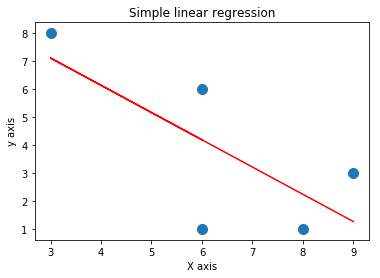

In [4]:
X = np.random.randint(1, 10, 5)
y = np.random.randint(1, 10, 5)
plt.scatter(X, y, s = 100)
plt.plot(X, np.polyval(np.polyfit(X,y,1), X), 'r-')
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.title('Simple linear regression')

In [5]:
print(np.polyfit(X,y,1)) # Slope and intercept of the linear regression line

[ -0.97169811  10.01886792]


### Multiple Linear Regression:

#### Definition:

[**Multiple linear regression**](http://www.statisticssolutions.com/what-is-multiple-linear-regression/) is the most common form of linear regression analysis.  As a predictive analysis, the multiple linear regression is used to explain the relationship between one continuous dependent variable and two or more independent variables.

#### Formula:

$$Y = a_1X_1 + a_2X_2 + . . . + a_nX_n + b + \epsilon$$

> - With :
    <br><br>
    - $Y:$ Dependent variable
    <br><br>
    - $a_i:$ Slope
    <br><br>
    - $X_i:$ Independent variable
    <br><br>
    - $b:$ Intercept
     <br><br>
    - $\epsilon:$ Random error
    

### Linear Regression for Stock price prediction:

#### Simple Linear regression:

In [6]:
import pandas as pd
import seaborn; seaborn.set()
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [7]:
data = pd.read_csv("Downloads/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-19,375.000000,376.700012,367.799988,369.799988,369.799988,6549300
1,2017-06-20,376.670013,378.880005,369.730011,372.239990,372.239990,7438700
2,2017-06-21,374.350006,376.989990,368.019989,376.399994,376.399994,4923200
3,2017-06-22,377.989990,385.000000,373.570007,382.609985,382.609985,7529800
4,2017-06-23,382.450012,386.989990,379.350006,383.450012,383.450012,6445800


In [8]:
data["Date"] = data.index + 1 # turn the date into a set of consecutive integers
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1,375.000000,376.700012,367.799988,369.799988,369.799988,6549300
1,2,376.670013,378.880005,369.730011,372.239990,372.239990,7438700
2,3,374.350006,376.989990,368.019989,376.399994,376.399994,4923200
3,4,377.989990,385.000000,373.570007,382.609985,382.609985,7529800
4,5,382.450012,386.989990,379.350006,383.450012,383.450012,6445800


In [9]:
# the training set
X_train = data["Date"][:-20].values.reshape(231, 1)
y_train = data["Adj Close"][:-20]

In [10]:
# the testing set
X_test = data["Date"][-20:].values.reshape(20, 1)
y_test = data["Adj Close"][-20:]

In [11]:
reg = LinearRegression()

In [12]:
# training the model
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# prediction
prediction = reg.predict(X_test)
prediction

array([ 300.98268374,  300.73624546,  300.48980719,  300.24336891,
        299.99693064,  299.75049237,  299.50405409,  299.25761582,
        299.01117755,  298.76473927,  298.518301  ,  298.27186273,
        298.02542445,  297.77898618,  297.5325479 ,  297.28610963,
        297.03967136,  296.79323308,  296.54679481,  296.30035654])

In [14]:
# concatenate the training set with the prediction result
T_set = pd.DataFrame(y_train)
T_set.columns = ["Prediction"]
y_pred = pd.DataFrame(prediction, index = range(231, 251),
                      columns = ["Prediction"])
P_set = [T_set, y_pred]
pd.concat(P_set).head()

,Prediction
0,369.799988
1,372.239990
2,376.399994
3,382.609985
4,383.450012


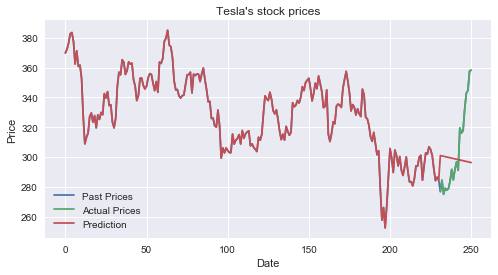

In [15]:
# Graphical representation with matplotlib
plt.figure(figsize=(8, 4))
plt.plot(data["Adj Close"], label="Past Prices")
plt.plot(y_test, label = "Actual Prices")
plt.plot(pd.concat(P_set), label= "Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tesla's stock prices")
plt.legend()
# P.S: blue and red plots are on top of each other

In [16]:
# Root Mean Squared Error:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = prediction))
RMSE

29.8841457453188

#### What's wrong with our prediction ?

it's not a surprise that our prediction is far from being close to the testing data, mainly because the stock market is first and foremost a stochastic and highly volatile environement with unpredictable outcomes, in addition to that our linear regression is a simple one that only has a single variable which doesn't affect at all the price of Tesla stocks.
So what's the solution then ?
in the next section we will try Multiple Linear regression the most widely used type of regression Analysis.

#### Multiple linear regression:

In [22]:
features = ["Date", "Open", "Volume"]
target = ["Adj Close"]

In [23]:
# the training set
X_train = data[features][:-20]
y_train = data["Adj Close"][:-20]

In [24]:
# the testing set
X_test = data[features][-20:]
y_test = data["Adj Close"][-20:]

In [25]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# prediction
prediction = reg.predict(X_test)
prediction

array([ 287.15643281,  283.67962476,  289.46395056,  281.28806572,
        282.29453389,  281.67181599,  281.98433917,  285.7625377 ,
        289.64842676,  288.5567967 ,  296.27587975,  298.94323062,
        298.14555385,  313.23603268,  317.34049376,  319.17848559,
        336.6181578 ,  341.70316343,  342.11941726,  347.7618869 ])

In [27]:
y_pred = pd.DataFrame(prediction, index = range(231, 251),
                      columns = ["Prediction"])

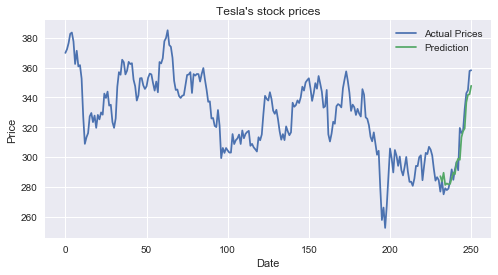

In [28]:
# Graphical representation with matplotlib
plt.figure(figsize=(8, 4))
plt.plot(data["Adj Close"], label="Actual Prices")
plt.plot(y_pred, label= "Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tesla's stock prices")
plt.legend()

In [29]:
# Root Mean Squared Error:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = prediction))
RMSE

8.700692891436779

#### Observation:

the **Root Mean squared Error** has decreased dramatically after adding more variables to our model.

#### Conclusion:

Linear regression isn't the best model for stock price prediction nor is it good for time series tasks ,even if our model performs well on the testing set it doesn't mean it will perform well in real world, predicting stock prices need more than 5 variables it sometimes need dozens if not hundreds of variables to get an accurate prediction of the market stock prices.